In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Stores.csv")
df_copy=df.copy()

In [3]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [4]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

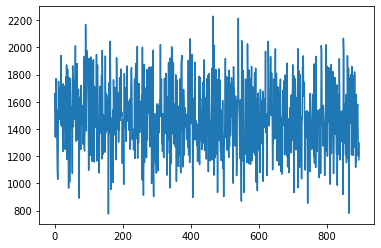

In [5]:
plt.plot(df['Store_Area'])

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


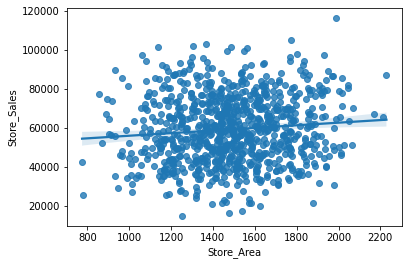

In [7]:
sns.regplot(x=df['Store_Area'], y=df['Store_Sales'], data=df);

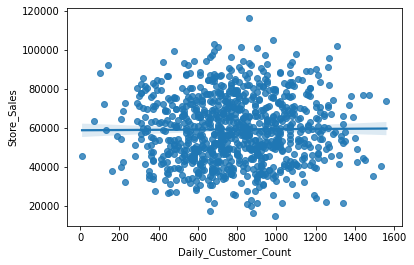

In [8]:
sns.regplot(x=df['Daily_Customer_Count'], y=df['Store_Sales'], data=df);

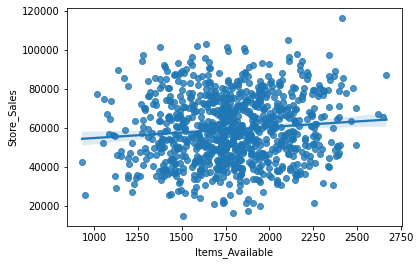

In [9]:
sns.regplot(x=df['Items_Available'], y=df['Store_Sales'], data=df);

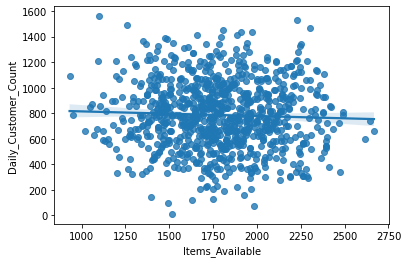

In [10]:
sns.regplot(x=df['Items_Available'], y=df['Daily_Customer_Count'], data=df);

In [11]:
features_list=df.columns[1:-1]
features_list

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count'], dtype='object')

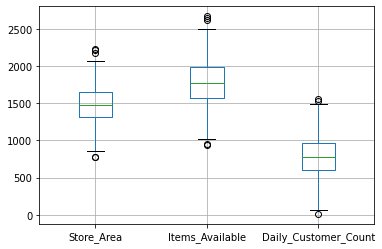

In [12]:
df[features_list].boxplot();

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[features_list]=scaler.fit_transform(df[features_list])
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,0.607978,0.593084,0.335484,66490
1,2,0.471802,0.472622,0.129032,39820
2,3,0.388583,0.390202,0.458065,54010
3,4,0.464924,0.470317,0.393548,53730
4,5,0.684319,0.679539,0.283871,46620
...,...,...,...,...,...
891,892,0.555021,0.563689,0.690323,66390
892,893,0.420908,0.421326,0.541935,82080
893,894,0.292297,0.290490,0.677419,76440
894,895,0.360385,0.361960,0.490323,96610


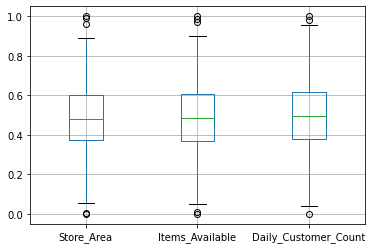

In [14]:
df[features_list].boxplot();

In [15]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,0.607978,0.593084,0.335484,66490
1,0.471802,0.472622,0.129032,39820
2,0.388583,0.390202,0.458065,54010
3,0.464924,0.470317,0.393548,53730
4,0.684319,0.679539,0.283871,46620
...,...,...,...,...
891,0.555021,0.563689,0.690323,66390
892,0.420908,0.421326,0.541935,82080
893,0.292297,0.290490,0.677419,76440
894,0.360385,0.361960,0.490323,96610


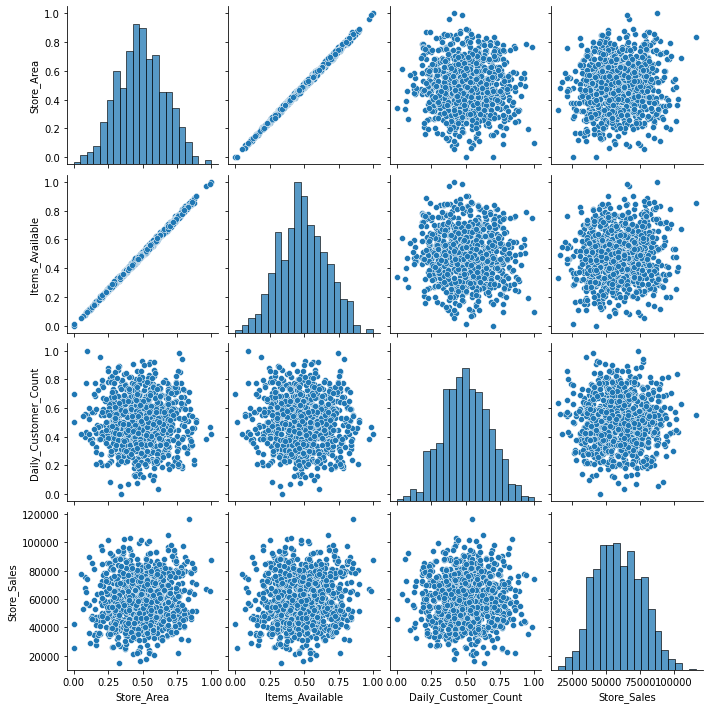

In [16]:
sns.pairplot(df);

In [17]:
df_copy['Sales_per_size']=df_copy['Store_Sales']/df['Store_Area']
df_copy['Sales_per_cust']=df_copy['Store_Sales']/df['Daily_Customer_Count']
df_copy['Sales_per_items_avail']=df_copy['Store_Sales']/df['Items_Available']
df_copy

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_size,Sales_per_cust,Sales_per_items_avail
0,1,1659,1961,530,66490,109362.511312,198191.346154,112108.989310
1,2,1461,1752,210,39820,84399.825073,308605.000000,84253.292683
2,3,1340,1609,720,54010,138992.106195,117909.154930,138415.583456
3,4,1451,1748,620,53730,115567.189349,136527.049180,114242.095588
4,5,1770,2111,450,46620,68126.110553,164229.545455,68605.343511
...,...,...,...,...,...,...,...,...
891,892,1582,1910,1080,66390,119617.174721,96172.429907,117777.760736
892,893,1387,1663,850,82080,195007.058824,151457.142857,194813.679891
893,894,1200,1436,1060,76440,261514.729412,112840.000000,263141.666667
894,895,1299,1560,770,96610,268074.312977,197033.552632,266908.200637


In [18]:
df_copy.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_size,Sales_per_cust,Sales_per_items_avail
count,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02,8.960000e+02,8.960000e+02
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804,inf,inf,inf
std,258.797218,250.237011,299.872053,265.389281,17190.741895,NaN,NaN,NaN
min,1.000000,775.000000,932.000000,10.000000,14920.000000,2.859137e+04,2.359796e+04,2.841358e+04
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000,9.138960e+04,8.773028e+04,9.064053e+04
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000,1.211973e+05,1.182713e+05,1.209622e+05
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000,1.618964e+05,1.620760e+05,1.629780e+05
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000,inf,inf,inf


What's the distribution of sales per store

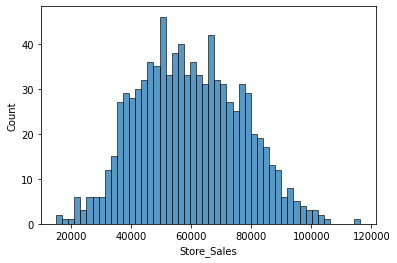

In [19]:
sns.histplot(df_copy['Store_Sales'], bins=50);

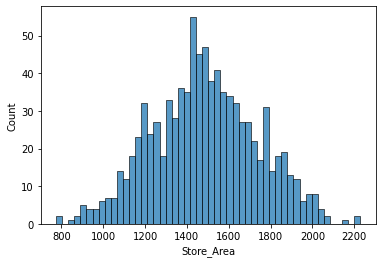

In [20]:
sns.histplot(df_copy['Store_Area'], bins=50);

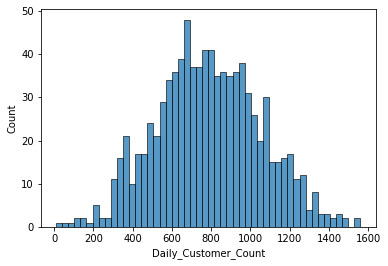

In [21]:
sns.histplot(df_copy['Daily_Customer_Count'], bins=50);

Find how many stores have lower than 25% of sales per size, under $31/yard sq

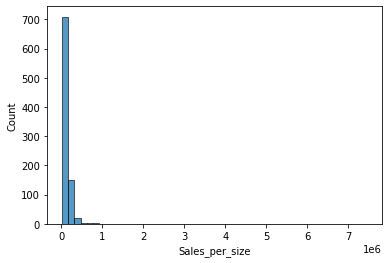

In [22]:
sns.histplot(df_copy['Sales_per_size'], bins=50);

(0.0, 1000.0)

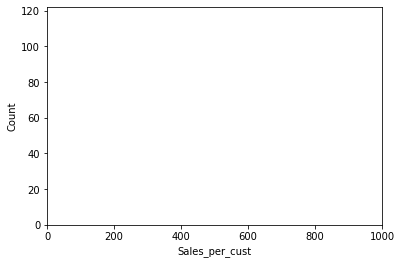

In [23]:
sns.histplot(df_copy['Sales_per_cust']);
plt.xlim((0,1000))

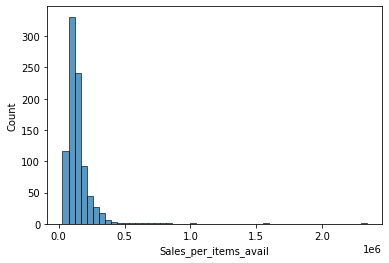

In [24]:
sns.histplot(df_copy['Sales_per_items_avail'], bins=50);

In [25]:
# How many stores > 75% of all the stores sizes with <25% of total sales

df_poor=df_copy[(df_copy['Store_Area']>1700) & (df_copy['Store_Sales']< 46000)]
df_poor

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_size,Sales_per_cust,Sales_per_items_avail
17,18,1703,2045,670,38170,59805.150862,89641.666667,59501.302785
19,20,1940,2340,980,40190,50159.879828,64221.134021,49523.899148
35,36,1871,2230,700,45460,60309.160584,102120.289855,60765.100154
43,44,1780,2117,780,39730,57480.019900,79975.974026,58170.084388
78,79,1720,2044,960,38660,59483.216931,63076.842105,60319.334532
117,118,1712,2046,460,31180,48383.906083,107397.777778,48561.310592
133,134,1713,2071,900,40490,62763.816631,70516.292135,61677.041264
164,165,1823,2176,700,37810,52457.767176,84935.507246,52733.400322
173,174,1762,2145,490,33460,49291.631206,108047.916667,47859.109646
205,206,1807,2149,910,38120,53707.829457,65651.111111,54345.275267


In [26]:
df_poor.count()

Store ID                 36
Store_Area               36
Items_Available          36
Daily_Customer_Count     36
Store_Sales              36
Sales_per_size           36
Sales_per_cust           36
Sales_per_items_avail    36
dtype: int64

In [27]:
percentage_poor = 36/896
percentage_poor

0.04017857142857143

show the number of stores earning less than $31/yard Sq

In [28]:
df_copy[df_copy['Sales_per_size']<31]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Sales_per_size,Sales_per_cust,Sales_per_items_avail


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[features_list]
y=df['Store_Sales']
Xtrain,Xtest,ytrain, ytest = train_test_split(X,y,test_size=0.3)

model=LinearRegression()
model.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)



In [30]:
error=y_pred - ytest
MAE=np.mean(abs(error))
MAE

13385.509909126458

In [31]:
from sklearn.model_selection import cross_validate
cv_score=cross_validate(model, Xtest,ytest, scoring = ['max_error','r2','neg_mean_absolute_error'],cv=8)
cv_score

#poor score

{'fit_time': array([0.00149798, 0.00128603, 0.00111198, 0.00096393, 0.000983  ,
        0.00101423, 0.00105023, 0.00096321]),
 'score_time': array([0.00125504, 0.00100088, 0.00088596, 0.00086403, 0.00090599,
        0.00093889, 0.00089693, 0.00087285]),
 'test_max_error': array([-31148.61943483, -41112.58896441, -43341.20887331, -29930.30917293,
        -34693.45453267, -38555.87427818, -29596.12423825, -35214.10827911]),
 'test_r2': array([-0.00883173, -0.14122248, -0.33924437,  0.01099526, -0.0016498 ,
        -0.01602338, -0.05448935, -0.13447652]),
 'test_neg_mean_absolute_error': array([-11961.81453227, -13977.79730223, -13981.16688372, -12916.12778316,
        -16471.64827191, -13157.11787674, -14109.14521381, -10785.78582362])}

In [32]:
Mae = abs(cv_score['test_neg_mean_absolute_error'].mean())
Mae

13420.075460933873

In [33]:
#try solvers
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

lin_sl_sgd= SGDRegressor(loss="squared_loss")
cv_score_sgd = cross_validate(lin_sl_sgd, X,y,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])


abs(cv_score_sgd['test_neg_mean_absolute_error'].mean())


/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient

14127.004200401812

In [34]:
mae_sgd= SGDRegressor(loss="epsilon_insensitive", epsilon = 0)

cv_mae_sgd = cross_validate(lin_sl_sgd, X,y,cv=10, \
    scoring=['max_error','r2','neg_mean_absolute_error','neg_mean_squared_error'])


abs(cv_mae_sgd['test_neg_mean_absolute_error'].mean())

/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient

14135.471637453793

In [36]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(X,y)
cv_score_MAE=cross_validate(neigh, X, y, scoring = 'neg_mean_absolute_error')


In [37]:
cv_score

{'fit_time': array([0.00149798, 0.00128603, 0.00111198, 0.00096393, 0.000983  ,
        0.00101423, 0.00105023, 0.00096321]),
 'score_time': array([0.00125504, 0.00100088, 0.00088596, 0.00086403, 0.00090599,
        0.00093889, 0.00089693, 0.00087285]),
 'test_max_error': array([-31148.61943483, -41112.58896441, -43341.20887331, -29930.30917293,
        -34693.45453267, -38555.87427818, -29596.12423825, -35214.10827911]),
 'test_r2': array([-0.00883173, -0.14122248, -0.33924437,  0.01099526, -0.0016498 ,
        -0.01602338, -0.05448935, -0.13447652]),
 'test_neg_mean_absolute_error': array([-11961.81453227, -13977.79730223, -13981.16688372, -12916.12778316,
        -16471.64827191, -13157.11787674, -14109.14521381, -10785.78582362])}

In [38]:
abs(cv_score['test_neg_mean_absolute_error'].mean()) #very close to Mae

13420.075460933873

In [39]:
new_store=pd.DataFrame(np.array([[1174,1429,1110]]),columns=['Store_Area', 'Items_Available', 'Daily_Customer_Count'])

In [40]:
new_store

,Store_Area,Items_Available,Daily_Customer_Count
0,1174,1429,1110


In [41]:
scaled_newstore=scaler.transform(new_store)
scaled_newstore

array([[0.27441541, 0.28645533, 0.70967742]])

In [42]:
new_sales=model.predict(scaled_newstore)
new_sales

/Users/lingchin/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58152.93326679])